In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import cifar10
from resnet_model import *

## load cifar10 data

In [18]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
num_classes = 10
input_shape = (32, 32, 3)
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)


[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


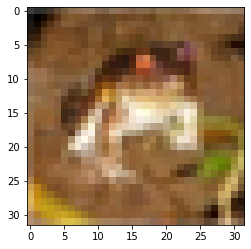

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [22]:
plt.imshow(X_train[0])
plt.show()
print(np.argmax(Y_train[0]))

In [10]:
model = ResNet34(input_shape=input_shape, num_classes=num_classes)
model.summary()

Model: "resnet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 32, 32, 64)   9472        ['input_3[0][0]']                
                                                                                                  
 batch_norm1 (BatchNormalizatio  (None, 32, 32, 64)  256         ['conv1[0][0]']                  
 n)                                                                                               
                                                                                                  
 activation1 (Activation)       (None, 32, 32, 64)   0           ['batch_norm1[0][0]']     

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20


2022-05-24 13:05:10.858238: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2022-05-24 13:05:12.085057: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


313/313 [==============================] - 17s 39ms/step - loss: 1.8583 - accuracy: 0.3133 - val_loss: 1.8445 - val_accuracy: 0.3243
Epoch 2/20
313/313 [==============================] - 11s 36ms/step - loss: 1.3663 - accuracy: 0.4974 - val_loss: 1.4717 - val_accuracy: 0.4667
Epoch 3/20
313/313 [==============================] - 11s 37ms/step - loss: 1.1519 - accuracy: 0.5837 - val_loss: 1.8731 - val_accuracy: 0.4049
Epoch 4/20
313/313 [==============================] - 11s 37ms/step - loss: 0.9892 - accuracy: 0.6446 - val_loss: 1.4699 - val_accuracy: 0.5296
Epoch 5/20
313/313 [==============================] - 11s 36ms/step - loss: 0.8561 - accuracy: 0.6993 - val_loss: 1.1796 - val_accuracy: 0.6231
Epoch 6/20
313/313 [==============================] - 12s 37ms/step - loss: 0.7374 - accuracy: 0.7426 - val_loss: 1.7796 - val_accuracy: 0.4784
Epoch 7/20
313/313 [==============================] - 12s 37ms/step - loss: 0.6598 - accuracy: 0.7676 - val_loss: 0.8691 - val_accuracy: 0.7044
Epo

In [14]:
model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 3s 8ms/step - loss: 1.2747 - accuracy: 0.7459


[1.2746652364730835, 0.7458999752998352]